In [1]:
import keplergl
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import shapely
from h3 import h3
%matplotlib inline

In [2]:
useful_tags = ox.settings.useful_tags_path + ['cycleway'] #use railway for rail
ox.config(data_folder='data', logs_folder='logs', 
          imgs_folder='imgs', cache_folder='cache',
          use_cache=True, log_console=True, useful_tags_path=useful_tags)

In [3]:
df = pd.read_excel('../Output/Final_LQI_walk_bike_old.xlsx')
df = df[['node','Final_LQI_NWS','Final_LQI_WSN']]
df.head()

,node,Final_LQI_NWS,Final_LQI_WSN
0,5362155527,0.166433,0.204958
1,5362155528,0.168391,0.207477
2,1947205651,0.153422,0.188488
3,306970645,0.234917,0.295071
4,1947205655,0.150499,0.184837


In [100]:
df2 = pd.read_excel('../Output/Final_LQI_walk_bike_pilot_2.xlsx')
df2 = df2[['node','Final_LQI_NWS','Final_LQI_WSN']]
df2.head()

,node,Final_LQI_NWS,Final_LQI_WSN
0,5362155527,0.167397,0.206015
1,5362155528,0.169375,0.208587
2,1947205651,0.154278,0.188819
3,306970645,0.228006,0.285151
4,1947205655,0.138971,0.168839


In [101]:
diff = pd.merge(df,df2,right_on='node',left_on='node',suffixes=['_old','_new'])
diff.head()

,node,Final_LQI_NWS_old,Final_LQI_WSN_old,Final_LQI_NWS_new,Final_LQI_WSN_new
0,5362155527,0.166433,0.204958,0.167397,0.206015
1,5362155528,0.168391,0.207477,0.169375,0.208587
2,1947205651,0.153422,0.188488,0.154278,0.188819
3,306970645,0.234917,0.295071,0.228006,0.285151
4,1947205655,0.150499,0.184837,0.138971,0.168839


In [102]:
for LQI in ['Final_LQI_NWS','Final_LQI_WSN']:
    diff[f'{LQI}_delta'] = diff[f'{LQI}_new'] - diff[f'{LQI}_old']
diff.head()

,node,Final_LQI_NWS_old,Final_LQI_WSN_old,Final_LQI_NWS_new,Final_LQI_WSN_new,Final_LQI_NWS_delta,Final_LQI_WSN_delta
0,5362155527,0.166433,0.204958,0.167397,0.206015,0.000965,0.001057
1,5362155528,0.168391,0.207477,0.169375,0.208587,0.000983,0.001111
2,1947205651,0.153422,0.188488,0.154278,0.188819,0.000856,0.000331
3,306970645,0.234917,0.295071,0.228006,0.285151,-0.006911,-0.009919
4,1947205655,0.150499,0.184837,0.138971,0.168839,-0.011527,-0.015998


Text(0.5, 1.0, '$\\Delta$ Final_LQI_NWS')

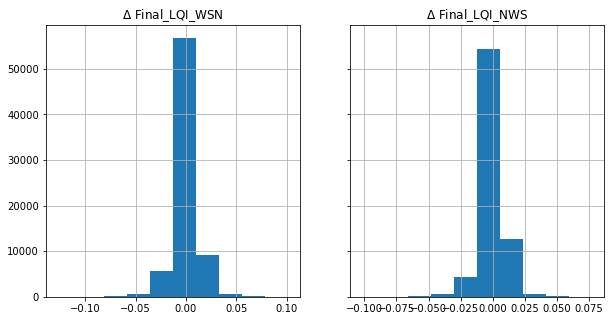

In [103]:
fig, ax = plt.subplots(1,2,figsize=(10,5),sharey=True)
diff.Final_LQI_WSN_delta.hist(ax=ax[0])
diff.Final_LQI_NWS_delta.hist(ax=ax[1])
ax[0].set_title('$\Delta$ Final_LQI_WSN')
ax[1].set_title('$\Delta$ Final_LQI_NWS')

Text(0.5, 1.0, '$\\Delta$ Final_LQI_NWS')

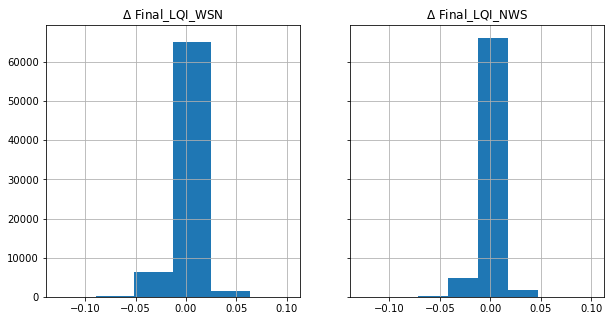

In [104]:
fig, ax = plt.subplots(1,2,figsize=(10,5),sharey=True, sharex=True)
diff.Final_LQI_WSN_delta.hist(ax=ax[0],bins=6)
diff.Final_LQI_NWS_delta.hist(ax=ax[1],bins=6)
ax[0].set_title('$\Delta$ Final_LQI_WSN')
ax[1].set_title('$\Delta$ Final_LQI_NWS')

In [105]:
crs_osm = {'init':'epsg:4326'}           #crs that osm uses

In [106]:
G = ox.load_graphml('data/networks/{}'.format('Budapest_walk_bike_pilot.graphml'), node_type=float)

In [107]:
nodes, edges = ox.graph_to_gdfs(G, edges=True)

In [108]:
nodes['node'] = nodes.index.astype(int)
nodes.head()

,district,females,highway,lat,lon,males,osmid,population,ref,x,...,NO_std,NOX_median,NOX_average,NOX_std,water,forest,river,park,geometry,node
5.362156e+09,12,9,nan,47.498372399999994,18.996563,7,5.362156e+09,16,nan,18.996563,...,25.2733993,85.2,93.134,46.37007129,0.0,3.989445885141104e-08,0.0,0.0,POINT (18.99656 47.49837),5362155527
5.362156e+09,12,9,nan,47.4982362,18.9969118,7,5.362156e+09,16,nan,18.996912,...,25.2733993,85.2,93.134,46.37007129,0.0,3.989445885141104e-08,0.0,0.0,POINT (18.99691 47.49824),5362155528
1.947206e+09,18,17,nan,47.43792299999999,19.1693194,15,1.947206e+09,32,nan,19.169319,...,15.45521247,28.55,37.48470588,32.52975676,0.0,0.0,0.0,0.0,POINT (19.16932 47.43792),1947205651
3.069706e+08,11,6,nan,47.483515399999995,19.0503803,5,3.069706e+08,12,nan,19.050380,...,24.26445195,48.05,65.1141129,48.38735659,2.4244983333325356e-09,0.0,0.0,8.304936860214646e-08,POINT (19.05038 47.48352),306970645
1.947206e+09,18,17,nan,47.4405623,19.1714837,15,1.947206e+09,32,nan,19.171484,...,15.45521247,28.55,37.48470588,32.52975676,0.0,0.0,0.0,0.0,POINT (19.17148 47.44056),1947205655


In [109]:
nodes = pd.merge(nodes,diff,left_on='node',right_on='node')

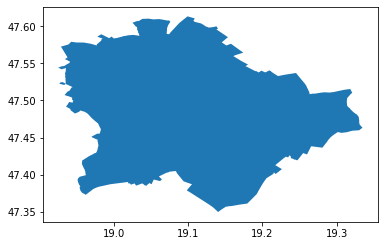

In [110]:
gdf = ox.gdf_from_place('Budapest')
gdf.plot()

In [39]:
def create_hexgrid(polygon, hex_res, geometry_col='geometry',buffer=0.000):
	"""
	Takes in a geopandas geodataframe, the desired resolution, the specified geometry column and some map parameters to create a hexagon grid (and potentially plot the hexgrid

	Arguments:
		polygon {geopandas.geoDataFrame} -- geoDataFrame to be used
		hex_res {int} -- Resolution to use

	Keyword Arguments:
		geometry_col {str} -- column in the geoDataFrame that contains the geometry (default: {'geometry'})
		buffer {float} -- buffer to be used (default: {0.000})

	Returns:
		geopandas.geoDataFrame -- geoDataFrame with the hexbins and the hex_id_{resolution} column
	"""
	centroid = list(polygon.centroid.values[0].coords)[0]

	# Explode multipolygon into individual polygons
	exploded = polygon.explode().reset_index(drop=True)

	# Master lists for geodataframe
	hexagon_polygon_list = []
	hexagon_geohash_list = []

	# For each exploded polygon
	for poly in exploded[geometry_col].values:

		# Reverse coords for original polygon
		reversed_coords = [[i[1], i[0]] for i in list(poly.exterior.coords)]

		# Reverse coords for buffered polygon
		buffer_poly = poly.buffer(buffer)
		reversed_buffer_coords = [[i[1], i[0]] for i in list(buffer_poly.exterior.coords)]

		# Format input to the way H3 expects it
		aoi_input = {'type': 'Polygon', 'coordinates': [reversed_buffer_coords]}

		# Generate list geohashes filling the AOI
		geohashes = list(h3.polyfill(aoi_input, hex_res))
		for geohash in geohashes:
			polygons = h3.h3_set_to_multi_polygon([geohash], geo_json=True)
			outlines = [loop for polygon in polygons for loop in polygon]
			polyline_geojson = [outline + [outline[0]] for outline in outlines][0]
			hexagon_polygon_list.append(shapely.geometry.Polygon(polyline_geojson))
			hexagon_geohash_list.append(geohash)

	# Create a geodataframe containing the hexagon geometries and hashes
	hexgrid_gdf = gpd.GeoDataFrame()
	hexgrid_gdf['geometry'] = hexagon_polygon_list
	id_col_name = 'hex_id_' + str(hex_res)
	hexgrid_gdf[id_col_name] = hexagon_geohash_list
	hexgrid_gdf.crs = {'init' :'epsg:4326'}

	# Drop duplicate geometries
	geoms_wkb = hexgrid_gdf["geometry"].apply(lambda geom: geom.wkb)
	hexgrid_gdf = hexgrid_gdf.loc[geoms_wkb.drop_duplicates().index]

	return hexgrid_gdf

In [40]:
resolution = 8
grid = create_hexgrid(gdf,resolution)

In [41]:
nodes_in_hex = gpd.sjoin(nodes, grid)
nodes_counts = nodes_in_hex.groupby([f'hex_id_{resolution}']).mean()
nodes_counts

,osmid,x,y,node,Final_LQI_NWS_old,Final_LQI_WSN_old,Final_LQI_NWS_new,Final_LQI_WSN_new,Final_LQI_NWS_delta,Final_LQI_WSN_delta,index_right
hex_id_8,,,,,,,,,,,
881e034493fffff,1.627861e+09,19.021707,47.585131,1.627861e+09,0.099316,0.118625,0.099316,0.118618,8.903421e-08,-0.000008,254.0
881e034497fffff,8.906856e+08,19.016048,47.582370,8.906856e+08,0.110368,0.132681,0.110368,0.132672,9.597316e-08,-0.000009,28.0
881e0344a1fffff,1.868365e+09,18.959961,47.570250,1.868365e+09,0.108780,0.130732,0.108780,0.130723,2.926317e-07,-0.000008,593.0
881e0344a3fffff,1.999902e+09,18.973402,47.568085,1.999902e+09,0.097668,0.116832,0.097668,0.116825,6.622487e-07,-0.000007,130.0
881e0344a5fffff,2.165583e+09,18.951387,47.565283,2.165583e+09,0.136066,0.166321,0.136066,0.166309,-1.359565e-07,-0.000011,436.0
...,...,...,...,...,...,...,...,...,...,...,...
881e1cb6d5fffff,2.699962e+09,18.968248,47.399247,2.699962e+09,0.082468,0.097205,0.082468,0.097199,1.586173e-07,-0.000006,545.0
881e1cb6d7fffff,2.330471e+09,18.979113,47.396187,2.330471e+09,0.122774,0.148707,0.122774,0.148698,6.297436e-08,-0.000010,498.0
881e1cb6d9fffff,1.976870e+09,18.975801,47.411824,1.976870e+09,0.068005,0.078518,0.068005,0.078513,2.345834e-07,-0.000005,50.0


In [42]:
hex_new = pd.merge(grid,nodes_counts,right_index=True,left_on=f'hex_id_{resolution}',how = 'outer')
hex_new = hex_new.drop('index_right',axis=1)
hex_new

,geometry,hex_id_8,osmid,x,y,node,Final_LQI_NWS_old,Final_LQI_WSN_old,Final_LQI_NWS_new,Final_LQI_WSN_new,Final_LQI_NWS_delta,Final_LQI_WSN_delta
0,"POLYGON ((18.97715 47.42878, 18.97473 47.42432...",881e0379edfffff,2.746796e+09,18.981570,47.425902,2.746796e+09,0.067522,0.077999,0.067522,0.077995,4.157340e-07,-0.000005
1,"POLYGON ((19.10186 47.44962, 19.10429 47.45407...",881e037887fffff,1.870550e+09,19.096547,47.453502,1.870550e+09,0.146326,0.178128,0.146326,0.178116,-3.924080e-08,-0.000012
2,"POLYGON ((19.07613 47.53693, 19.07856 47.54138...",881e037acbfffff,2.133117e+09,19.070987,47.540581,2.133117e+09,0.193429,0.240346,0.193429,0.240329,-4.626050e-08,-0.000016
3,"POLYGON ((19.17808 47.39372, 19.17565 47.38927...",881e036a8dfffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"POLYGON ((19.05904 47.49341, 19.06623 47.49437...",881e037aa1fffff,1.976720e+09,19.059916,47.496916,1.976720e+09,0.306936,0.388354,0.307011,0.388427,7.504948e-05,0.000073
...,...,...,...,...,...,...,...,...,...,...,...,...
698,"POLYGON ((19.19289 47.44522, 19.18569 47.44427...",881e036103fffff,1.873942e+09,19.190228,47.441409,1.873942e+09,0.122113,0.149599,0.122113,0.149589,-1.524891e-08,-0.000010
699,"POLYGON ((19.08351 47.56265, 19.09072 47.56361...",881e037115fffff,1.774112e+09,19.086429,47.566500,1.774112e+09,0.160793,0.197937,0.160793,0.197924,7.678471e-09,-0.000013
700,"POLYGON ((19.13259 47.39592, 19.13979 47.39688...",881e036a15fffff,2.662497e+09,19.134852,47.399886,2.662497e+09,0.078032,0.091097,0.078032,0.091091,-4.377482e-08,-0.000006
701,"POLYGON ((19.03978 47.48258, 19.04698 47.48355...",881e037819fffff,1.688142e+09,19.043281,47.487370,1.688142e+09,0.196820,0.244860,0.196820,0.244844,9.593703e-07,-0.000015


In [43]:
G_drive = ox.load_graphml('data/networks/{}'.format('Budapest_drive.graphml'), node_type=float)
edges = ox.graph_to_gdfs(G_drive,nodes=False)
edges['highway'] = edges.highway.apply(lambda x: x[0] if type(x)== list else x )

In [44]:
crs_bp = {'init': 'epsg:32633'}

gdf = ox.projection.project_gdf(gdf, to_crs=crs_bp, to_latlong=False)
hex_new = ox.projection.project_gdf(hex_new, to_crs=crs_bp, to_latlong=False)
edges = ox.projection.project_gdf(edges, to_crs=crs_bp, to_latlong=False)
grid = ox.projection.project_gdf(grid, to_crs=crs_bp, to_latlong=False)

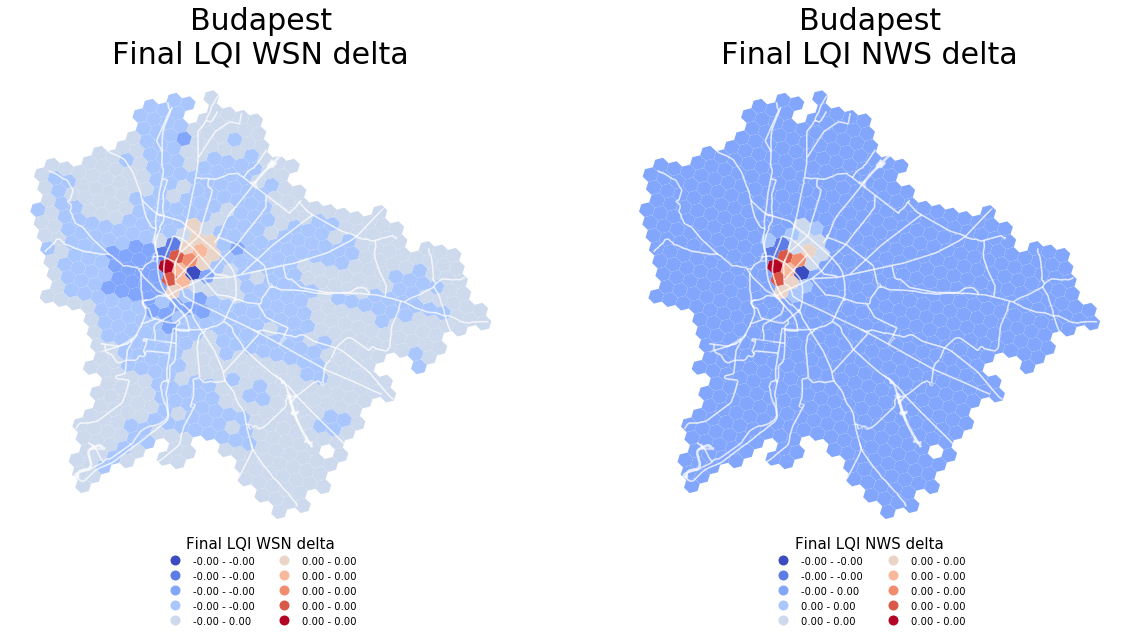

In [45]:
column = 'Final_LQI_WSN_delta'
fig, axes = plt.subplots(1,2, figsize=(20,10))
i = 0
for column in ['Final_LQI_WSN_delta','Final_LQI_NWS_delta']:
    ax = axes[i]
    hex_new.plot(column=column, legend=True,scheme='FisherJenks',k=10, cmap='coolwarm', ax=ax,
                 legend_kwds={'title':column.replace('_',' '),'title_fontsize':15,'ncol':2,'loc':8,'bbox_to_anchor':(0.5, -0.2),'frameon':False})
    edges[(edges['highway']=='motorway') | (edges['highway']=='motorway_link')].plot(ax=ax,color='white',alpha=0.5,linewidth=2.5,zorder=3)
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=ax,color='white',alpha=0.5,linewidth=1.5,zorder=3)
    ax.set_title('Budapest\n{}'.format(column.replace('_',' ')), fontdict={'fontsize':30})
    ax.axis('off');
    i+=1

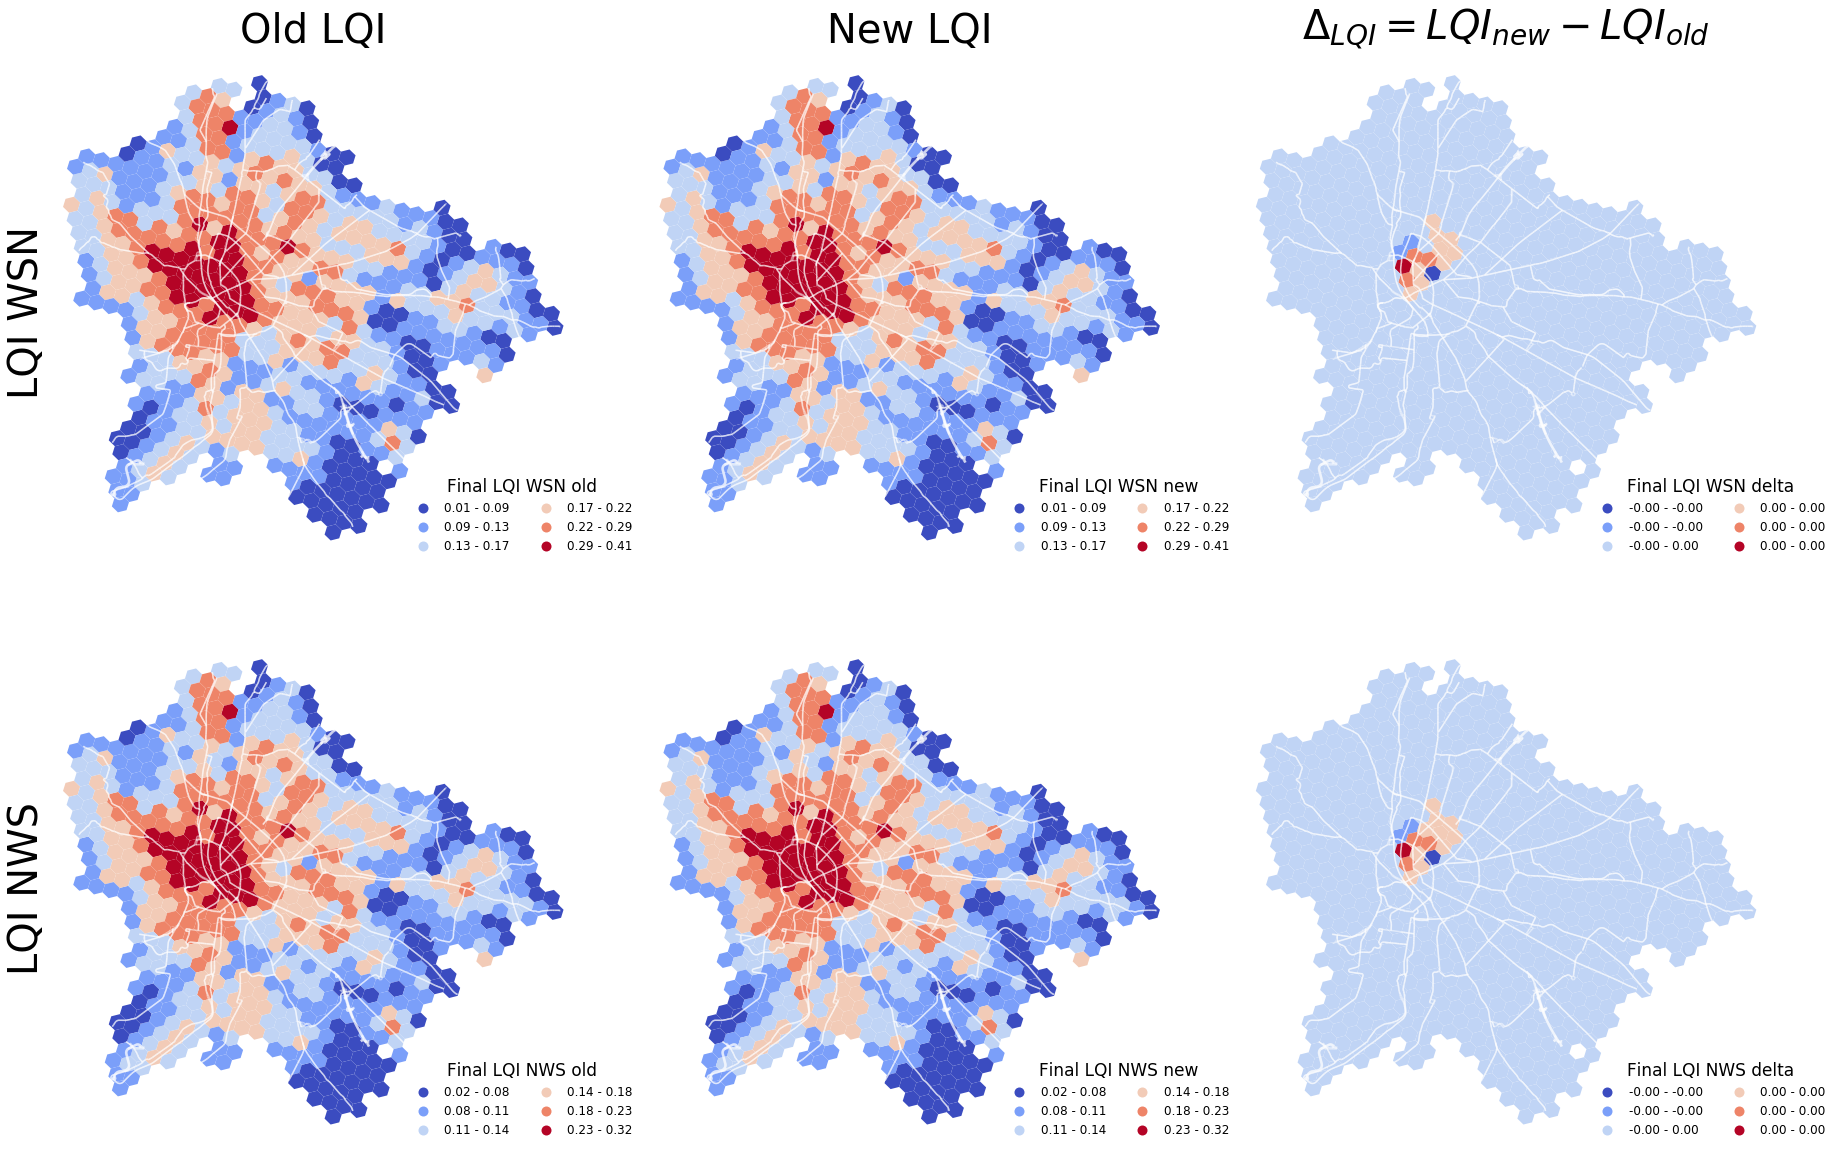

In [46]:
column = 'Final_LQI_WSN_delta'
fig, axes = plt.subplots(2,3, figsize=(25,20))
i = 0
for column, ax in zip(['Final_LQI_WSN_old','Final_LQI_WSN_new','Final_LQI_WSN_delta','Final_LQI_NWS_old','Final_LQI_NWS_new','Final_LQI_NWS_delta'],axes.flatten('C')):
    hex_new.plot(column=column, legend=True,scheme='FisherJenks',k=6, cmap='coolwarm', ax=ax,
                 legend_kwds={'title':column.replace('_',' '),'title_fontsize':17,'ncol':2,'loc':4,'frameon':False, 'fontsize':12,'bbox_to_anchor':(1.1, 0.0)}) #
    edges[(edges['highway']=='motorway') | (edges['highway']=='motorway_link')].plot(ax=ax,color='white',alpha=0.5,linewidth=2.5,zorder=3)
    edges[(edges['highway']=='primary') | (edges['highway']=='secondary')].plot(ax=ax,color='white',alpha=0.5,linewidth=1.5,zorder=3)
    ax.axis('off')
axes[0][0].set_title('Old LQI', fontdict={'fontsize':40})
axes[0][1].set_title('New LQI', fontdict={'fontsize':40})
axes[0][2].set_title('$\Delta_{LQI}=LQI_{new}-LQI_{old}$', fontdict={'fontsize':40})
Name1 = fig.text(0.0, 0.7, 'LQI WSN', va='center', ha='center', rotation=90, fontsize=40, transform=fig.transFigure)
Name2 = fig.text(0.0, 0.3, 'LQI NWS', va='center', ha='center',rotation=90, fontsize=40,transform=fig.transFigure)
fig.tight_layout()
fig.subplots_adjust(hspace=-0.3)
plt.savefig('../Output/plots/LQI_comparison.png',dpi=300,transparent=False);

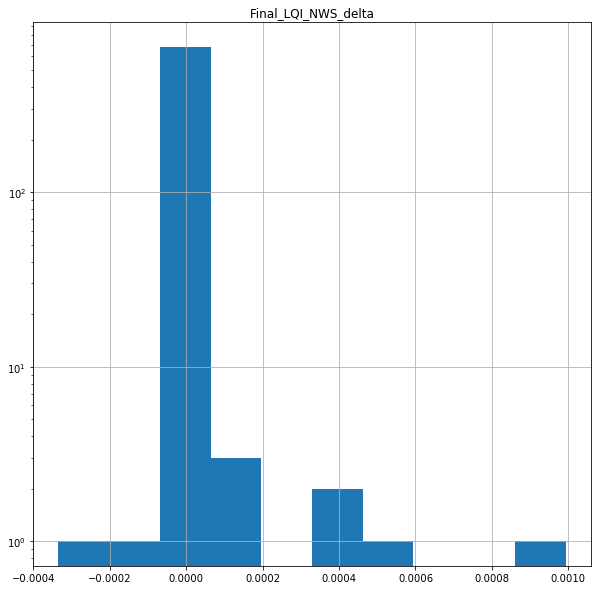

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
hex_new[['Final_LQI_NWS_delta']].hist(ax=ax)
ax.set_yscale('log')
ax.set_yscale('log')

In [111]:
nodes.head()

,district,females,highway,lat,lon,males,osmid,population,ref,x,...,river,park,geometry,node,Final_LQI_NWS_old,Final_LQI_WSN_old,Final_LQI_NWS_new,Final_LQI_WSN_new,Final_LQI_NWS_delta,Final_LQI_WSN_delta
0,12,9,nan,47.498372399999994,18.996563,7,5.362156e+09,16,nan,18.996563,...,0.0,0.0,POINT (18.99656 47.49837),5362155527,0.166433,0.204958,0.167397,0.206015,0.000965,0.001057
1,12,9,nan,47.4982362,18.9969118,7,5.362156e+09,16,nan,18.996912,...,0.0,0.0,POINT (18.99691 47.49824),5362155528,0.168391,0.207477,0.169375,0.208587,0.000983,0.001111
2,18,17,nan,47.43792299999999,19.1693194,15,1.947206e+09,32,nan,19.169319,...,0.0,0.0,POINT (19.16932 47.43792),1947205651,0.153422,0.188488,0.154278,0.188819,0.000856,0.000331
3,11,6,nan,47.483515399999995,19.0503803,5,3.069706e+08,12,nan,19.050380,...,0.0,8.304936860214646e-08,POINT (19.05038 47.48352),306970645,0.234917,0.295071,0.228006,0.285151,-0.006911,-0.009919
4,18,17,nan,47.4405623,19.1714837,15,1.947206e+09,32,nan,19.171484,...,0.0,0.0,POINT (19.17148 47.44056),1947205655,0.150499,0.184837,0.138971,0.168839,-0.011527,-0.015998


In [127]:
import keplergl
w1 = keplergl.KeplerGl(height=800)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [128]:
w1.add_data(nodes, name='nodes')
w1.add_data(districts, name='districts')
w1

KeplerGl(data={'nodes': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2…

In [130]:
w1.save_to_html(file_name='nodes_LQI.html',read_only=False)

Map saved to nodes_LQI.html!


In [114]:
import os
def load_data():
    #Load the districts shapes
    folder = "data/l40-district"
    districts = gpd.GeoDataFrame.from_file('data/l40-district/001-budapest-01-kerulet.geojson')
    files = [file for file in os.listdir(folder)]
    #for file in os.listdir(folder):
    #    files.append(file)
    del files[2]

    districts=pd.concat([gpd.read_file('data/l40-district/{}'.format(file))for file in files
                        ]).pipe(gpd.GeoDataFrame)
    districts.crs = {'init': 'epsg:4326'}
    districts['ksh'] = districts.ksh.astype(int)
    districts.reset_index(drop=True, inplace=True)
    #districts=ox.project_gdf(districts)
    districts=ox.utils_geo.projection.project_gdf(districts)

    #Load the population data and merg it with the districts geodataframe
    df_population = pd.read_excel('data/BPPopulation.xlsx')
    districts = districts.merge(df_population, how='left',left_on='ksh',right_on='ksh')
    districts = ox.utils_geo.projection.project_gdf(districts, to_crs=crs_osm, to_latlong=True)
    return districts

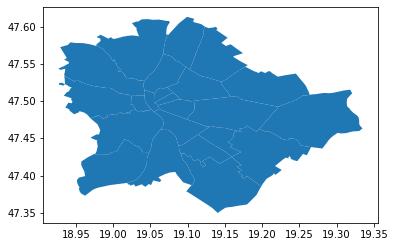

In [124]:
districts = load_data()
districts.plot()

In [125]:
districts['ksh'] = districts['ksh'].astype(str)
districts = pd.merge(districts, nodes.groupby('district').mean().reset_index(), left_on='ksh', right_on='district', how='outer')

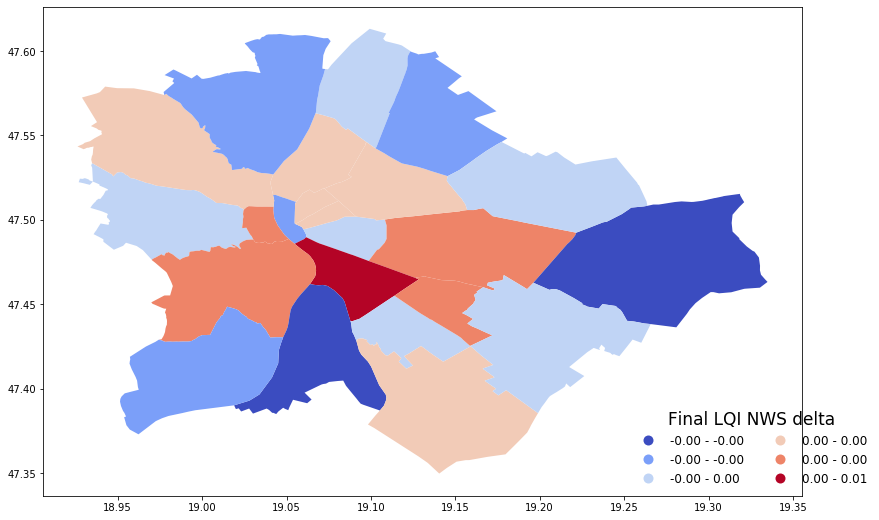

In [126]:
fig, ax = plt.subplots(figsize=(16,9))
districts.plot(column='Final_LQI_WSN_delta', legend=True, scheme='FisherJenks',k=6, cmap='coolwarm', ax=ax,
                 legend_kwds={'title':column.replace('_',' '),'title_fontsize':17,'ncol':2,'loc':4,'frameon':False, 'fontsize':12,'bbox_to_anchor':(1.1, 0.0)})